# ***Importing Libraries***

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# ***Loading the Dataset***

In [ ]:
!gdown --id 1Cv_QFk2uSOU0eUdRwR8kshrCXAFFuUbI
!gdown --id 1rCV5FOOYPQVGvV_O2vkJ8OyB6XAM19Mb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Cv_QFk2uSOU0eUdRwR8kshrCXAFFuUbI
To: /content/yield_df.csv
100% 1.32M/1.32M [00:00<00:00, 11.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1rCV5FOOYPQVGvV_O2vkJ8OyB6XAM19Mb
From (redirected): https://drive.google.com/uc?id=1rCV5FOOYPQVGvV_O2vkJ8OyB6XAM19Mb&confirm=t&uuid=4f075d4e-28a4-4379-8db6-134262a1e2d0
To: /content/myanfis.py
100% 17.7k/17.7k [00:00<00:00, 33.5MB/s]


In [ ]:
df = pd.read_csv('/content/yield_df.csv')
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
df.tail()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657,2550.07,19.76


In [ ]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (28242, 7)


# ***Preprocessing of the dataset***

In [ ]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [ ]:
# to check the unique values
for i in df.columns:
    print("-------------------------------",i,"-------------------------------")
    print()
    print(set(df[i].tolist()))
    print()

------------------------------- Area -------------------------------

{'New Zealand', 'Sweden', 'Tunisia', 'Botswana', 'Nicaragua', 'Cameroon', 'Albania', 'Dominican Republic', 'Ecuador', 'Armenia', 'Romania', 'India', 'Belgium', 'Canada', 'Japan', 'Tajikistan', 'Jamaica', 'Finland', 'Austria', 'Chile', 'Madagascar', 'Niger', 'Namibia', 'Iraq', 'Bangladesh', 'Belarus', 'Ghana', 'Azerbaijan', 'Sudan', 'Honduras', 'Greece', 'South Africa', 'Peru', 'Burundi', 'Latvia', 'Zambia', 'Colombia', 'United Kingdom', 'Slovenia', 'Italy', 'Estonia', 'Ireland', 'Malawi', 'Uganda', 'Senegal', 'Suriname', 'Poland', 'Nepal', 'Denmark', 'Bulgaria', 'Turkey', 'Morocco', 'Thailand', 'Burkina Faso', 'Australia', 'Germany', 'El Salvador', 'Libya', 'Rwanda', 'Papua New Guinea', 'Lesotho', 'Mali', 'Zimbabwe', 'Malaysia', 'Montenegro', 'Mauritania', 'Uruguay', 'Brazil', 'Mozambique', 'Mexico', 'Netherlands', 'Saudi Arabia', 'Haiti', 'Lithuania', 'Kazakhstan', 'Eritrea', 'Central African Republic', 'Kenya', 'Al

In [ ]:
# Check the duplicates record
df.duplicated().sum()

2310

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


# ***Visualization***

# ***Modelling***

In [ ]:
df1 = df.copy()

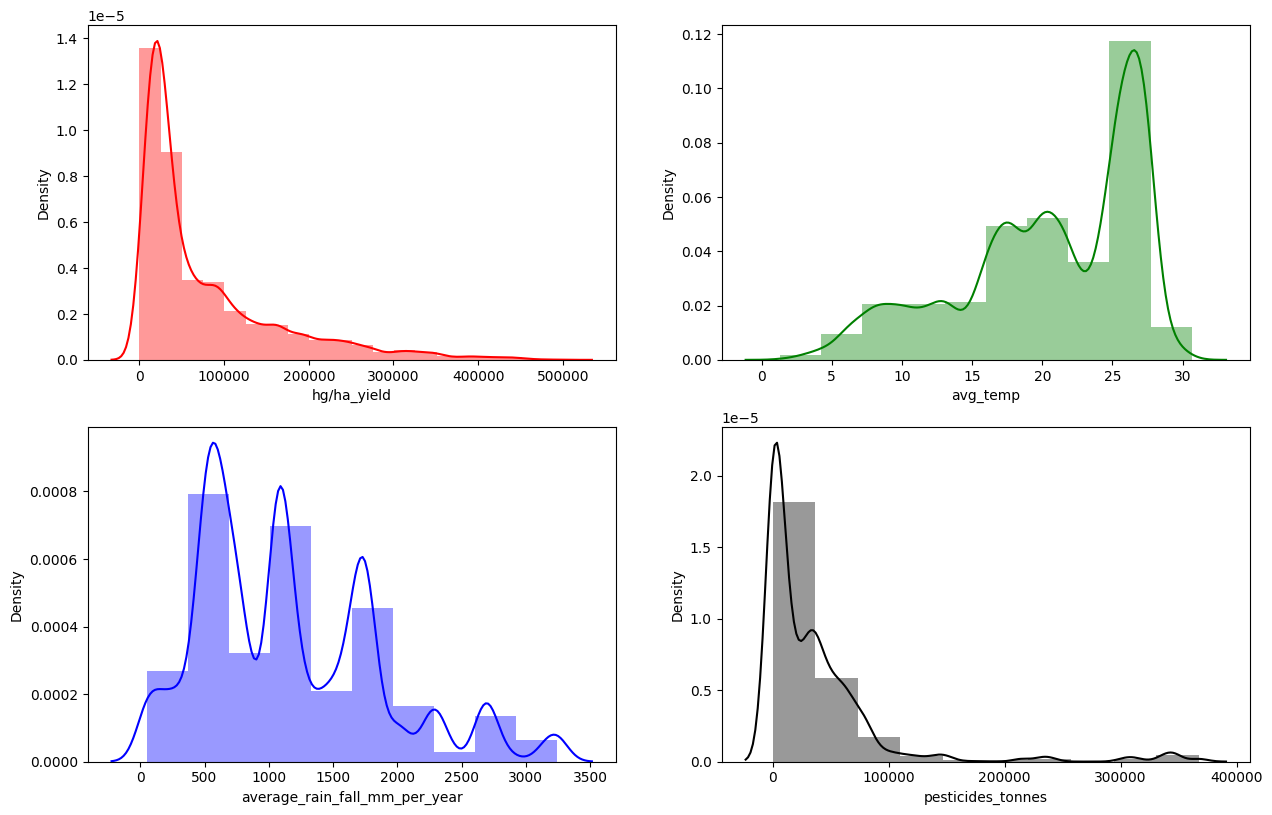

In [ ]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df1['hg/ha_yield'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(df1['avg_temp'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(df1['average_rain_fall_mm_per_year'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(df1['pesticides_tonnes'],bins = 10, color = 'black')
plt.show()

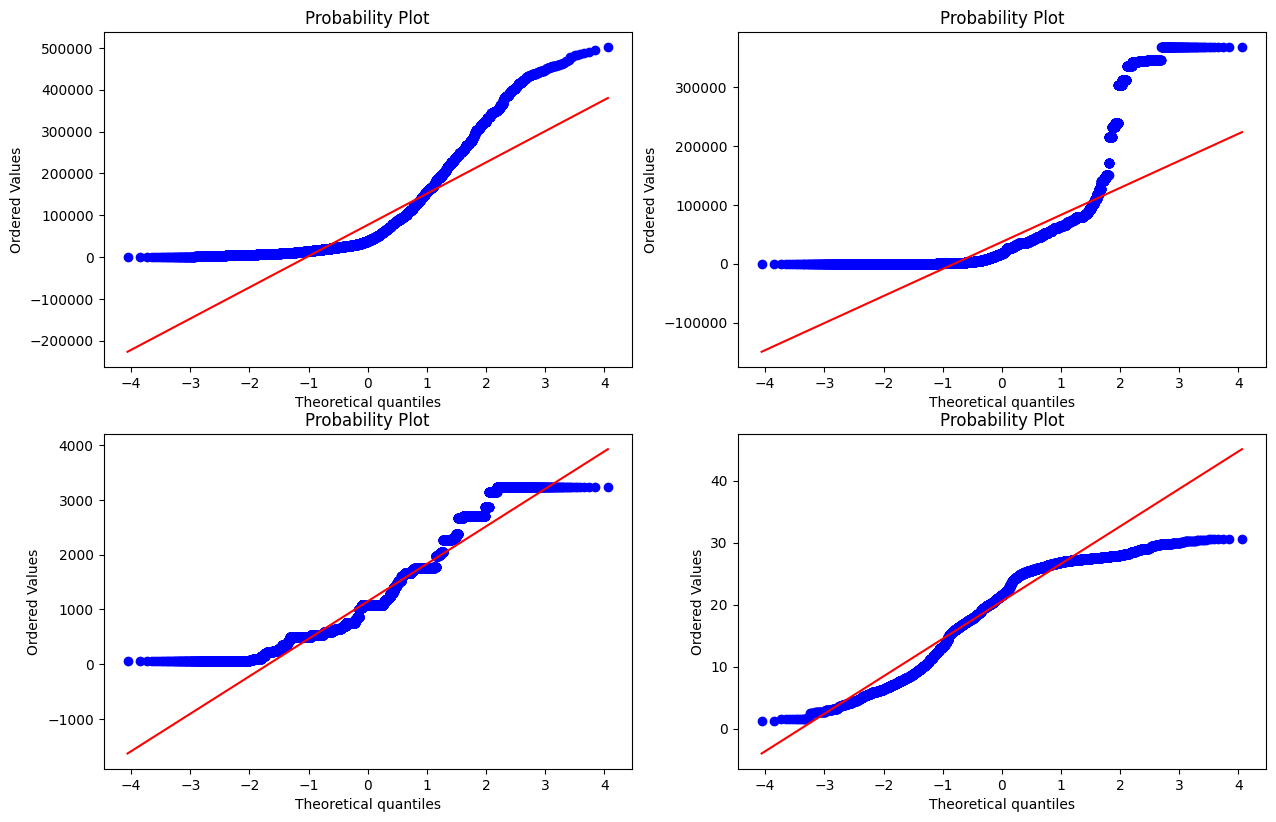

In [ ]:
# Q-Q plot of the dataset
import scipy.stats as stats

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df1['hg/ha_yield'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df1['pesticides_tonnes'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df1['average_rain_fall_mm_per_year'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df1['avg_temp'], dist = 'norm', plot = plt)
plt.show()

### ***Data distribution have right skewness - to remove skewness using transformation approach***

### ***The algorithm is more likely to be biased when the data distribution is skewed***

### Split the data into dependent and independent variable

In [ ]:
pip install anfis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=4cf621de9d8a74d6c4d83b80914af7922b2ff9f827365aaf7f2e85c82d8761ae
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.8 MB/s eta 0:00:00


In [ ]:
# Test myanfis model
import myanfis
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.optimizers import *
import mealpy


HELLO


In [ ]:
x = df1.drop('hg/ha_yield', axis=1)
# Convert the pandas Series to a NumPy array
Y=df['hg/ha_yield'].to_numpy()

# Now, you can use reshape on the NumPy array
y = Y.reshape(-1, 1)

print(x.shape)
print(y.shape)

(28242, 6)
(28242, 1)


In [ ]:
#Label Encoding
label_encoder = LabelEncoder()
x['Area'] = label_encoder.fit_transform(df['Area'])
x['Item'] = label_encoder.fit_transform(df['Item'])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)
print(len(X))

scaler = StandardScaler()
Y = scaler.fit_transform(y)
print(Y)
print(len(Y))

[[-1.73404116 -1.29811042 -1.63707532  0.47329419 -0.61636612 -0.66106889]
 [-1.73404116 -0.53918079 -1.63707532  0.47329419 -0.61636612 -0.66106889]
 [-1.73404116 -0.15971597 -1.63707532  0.47329419 -0.61636612 -0.66106889]
 ...
 [ 1.99550277  0.59921367  1.62451233 -0.69323228 -0.57585308 -0.12399147]
 [ 1.99550277  0.97867849  1.62451233 -0.69323228 -0.57585308 -0.12399147]
 [ 1.99550277  1.35814331  1.62451233 -0.69323228 -0.57585308 -0.12399147]]
28242
[[-0.47602001]
 [-0.12225671]
 [-0.63233786]
 ...
 [-0.75229534]
 [-0.64541536]
 [-0.63757593]]
28242


In [ ]:
input_data = pd.DataFrame(X, columns=['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'])
output_data = pd.DataFrame(Y, columns=['hg/ha_yield'])

display(input_data)
display(output_data)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,-1.734041,-1.298110,-1.637075,0.473294,-0.616366,-0.661069
1,-1.734041,-0.539181,-1.637075,0.473294,-0.616366,-0.661069
2,-1.734041,-0.159716,-1.637075,0.473294,-0.616366,-0.661069
3,-1.734041,0.219749,-1.637075,0.473294,-0.616366,-0.661069
4,-1.734041,0.599214,-1.637075,0.473294,-0.616366,-0.661069
...,...,...,...,...,...,...
28237,1.995503,-0.159716,1.624512,-0.693232,-0.575853,-0.123991
28238,1.995503,0.219749,1.624512,-0.693232,-0.575853,-0.123991
28239,1.995503,0.599214,1.624512,-0.693232,-0.575853,-0.123991
28240,1.995503,0.978678,1.624512,-0.693232,-0.575853,-0.123991


,hg/ha_yield
0,-0.476020
1,-0.122257
2,-0.632338
3,-0.759852
4,-0.824592
...,...
28237,-0.641190
28238,-0.870899
28239,-0.752295
28240,-0.645415


In [ ]:
    def split_data(x, y, batch_size,split_ratio):
        # adjust x and y for batch_size
        adj_id = np.arange(len(y) - len(y) % batch_size)
        x, y = x[adj_id, :], y[adj_id]

        # split test & train according to batches
        batches = len(y) / batch_size
        print(batches," batches")
        train_batches = np.round(batches * split_ratio) / batches

        train_id = np.arange(len(y) * train_batches, dtype=int)
        test_id = np.arange(len(y) * train_batches, len(y), dtype=int)

        X_train, y_train, X_test, y_test = x[train_id, :], y[train_id], x[test_id, :], y[test_id]

        return X_train, X_test, y_train, y_test



X_train, X_test, y_train, y_test = split_data(X, Y, 16, 0.8)
X_train, X_val, y_train, y_val = split_data(X_train, y_train, 16, 0.9)


1765.0  batches
1412.0  batches


In [ ]:
total_rows = X.shape[0]
train = X_train.shape[0]
test = X_test.shape[0]
val = X_val.shape[0]
print(total_rows)

percent_train_in_total = (train / total_rows) * 100
percent_val_in_train = (val / train) * 100

print(f"Percentage of training data in total: {percent_train_in_total:.2f}% of total data")
print(f"Percentage of validation data in training set: {percent_val_in_train:.2f}% of training data")

28242
Percentage of training data in total: 72.01% of total data
Percentage of validation data in training set: 11.09% of training data


In [ ]:
xt = pd.DataFrame(X_train)

# Display the DataFrame
display(xt)

,0,1,2,3,4,5
0,-1.734041,-1.298110,-1.637075,0.473294,-0.616366,-0.661069
1,-1.734041,-0.539181,-1.637075,0.473294,-0.616366,-0.661069
2,-1.734041,-0.159716,-1.637075,0.473294,-0.616366,-0.661069
3,-1.734041,0.219749,-1.637075,0.473294,-0.616366,-0.661069
4,-1.734041,0.599214,-1.637075,0.473294,-0.616366,-0.661069
...,...,...,...,...,...,...
20331,0.578276,-1.298110,1.482704,-0.550939,0.457578,0.468536
20332,0.578276,-1.298110,1.482704,-0.550939,0.457578,-0.131913
20333,0.578276,-1.298110,1.482704,-0.550939,0.457578,-0.529572
20334,0.578276,-1.298110,1.482704,-0.550939,0.457578,0.154845


In [ ]:
# set parameters
param = myanfis.fis_parameters(
        n_input=6,                # no. of Regressors
        n_memb=2,                 # no. of fuzzy memberships
        batch_size=16,            # 16 / 32 / 64 / ...
        memb_func='gaussian',      # 'gaussian' / 'gbellmf' / 'sigmoid'
        # optimizer='Adafactor',          # sgd / adam / ...
        # mse / mae / huber_loss / mean_absolute_percentage_error / ...
        loss='huber_loss',
        n_epochs=100   # 10 / 25 / 50 / 100 / ...
    )

In [ ]:
fis = myanfis.ANFIS(n_input=param.n_input,
                    n_memb=param.n_memb,
                    batch_size=param.batch_size,
                    memb_func=param.memb_func,
                    name='myanfis')

# compile model
fis.model.compile(optimizer=param.optimizer,
                  loss=param.loss,
                  metrics=['mse'])


# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint("best_model_weights.h5",
                             monitor='val_loss',  # or 'val_mse' depending on what you want to monitor
                             save_weights_only=True,
                             save_best_only=True,
                             mode='min',  # 'min' if monitoring loss, 'max' if monitoring accuracy, 'auto' will infer from the metric name
                             verbose=1)

history = fis.fit(X_train, y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data=( X_val, y_val),
                  # callbacks = [tensorboard_callback]  # for tensorboard
                  callbacks=[checkpoint]
)

Epoch 1/100
1262/1271 [============================>.] - ETA: 0s - loss: 0.8107 - mse: 2.6263
Epoch 1: val_loss improved from inf to 0.74046, saving model to best_model_weights.h5
1271/1271 [==============================] - 4s 2ms/step - loss: 0.8093 - mse: 2.6202 - val_loss: 0.7405 - val_mse: 2.1940
Epoch 2/100
1262/1271 [============================>.] - ETA: 0s - loss: 0.5103 - mse: 1.3473
Epoch 2: val_loss improved from 0.74046 to 0.60132, saving model to best_model_weights.h5
1271/1271 [==============================] - 3s 2ms/step - loss: 0.5101 - mse: 1.3469 - val_loss: 0.6013 - val_mse: 1.6686
Epoch 3/100
1265/1271 [============================>.] - ETA: 0s - loss: 0.4458 - mse: 1.1540
Epoch 3: val_loss improved from 0.60132 to 0.54198, saving model to best_model_weights.h5
1271/1271 [==============================] - 3s 3ms/step - loss: 0.4460 - mse: 1.1542 - val_loss: 0.5420 - val_mse: 1.4668
Epoch 4/100
1248/1271 [============================>.] - ETA: 0s - loss: 0.4129 - m

In [ ]:
# make predictions on the test set
y_pred = fis(X_test)
print(y_pred.shape)
print(y_test.shape)

# Print actual and predicted values
print("Actual values:", y_test)
print("Predicted values:", y_pred)

# inverse transform predictions and actuals
y_pred_original = scaler.inverse_transform(y_pred)
print(y_pred_original)
y_test_original = scaler.inverse_transform(y_test)
print(y_test_original)

    # Plotting Predictions vs. Actuals
    # plt.figure(figsize=(10, 6))
    # plt.scatter(y_test_original, y_pred_original,alpha=0.5)
    # plt.title('Predicted vs. Actual Yield')
    # plt.xlabel('Actual Yield')
    # plt.ylabel('Predicted Yield')
    # plt.show()

# eval model
import pandas as pd
fis.plotmfs(show_initial_weights=True)

fis.model.summary()

NameError: name 'fis' is not defined

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

mse = mean_squared_error(y_test, y_pred)
print(mse)

import math
rmse = math.sqrt(mse)
print(rmse)

0.740067339038855
1.0392665282546305
1.019444225180873


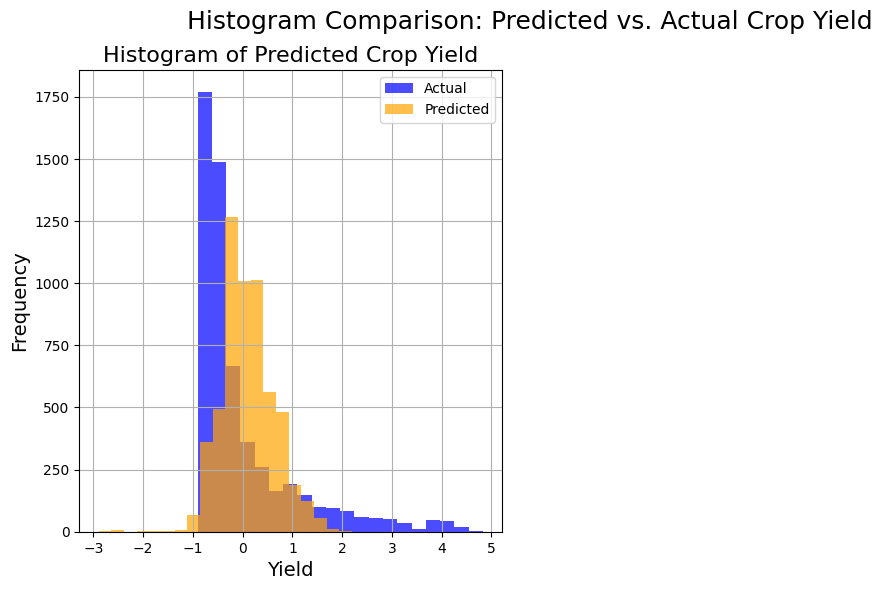

In [ ]:
plot_learningcurves=True
plot_prediction=True


if plot_prediction:
    # Create a figure for the histograms
    plt.figure(figsize=(12, 6))
    plt.suptitle('Histogram Comparison: Predicted vs. Actual Crop Yield', size=18)

    # Plot histogram for actual values
    plt.subplot(1, 2, 1)
    plt.hist(y_test, bins=20, color='blue', alpha=0.7, label='Actual')
    plt.title('Histogram of Actual Crop Yield', size=16)
    plt.xlabel('Yield', size=14)
    plt.ylabel('Frequency', size=14)
    plt.legend()
    plt.grid(True)

    # Plot histogram for predicted values
    plt.subplot(1, 2, 1)
    plt.hist(y_pred, bins=20, color='orange', alpha=0.7, label='Predicted')
    plt.title('Histogram of Predicted Crop Yield', size=16)
    plt.xlabel('Yield', size=14)
    plt.ylabel('Frequency', size=14)
    plt.legend()
    plt.grid(True)

    # Adjust layout to prevent overlap
    # plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Display the histograms
    plt.show()

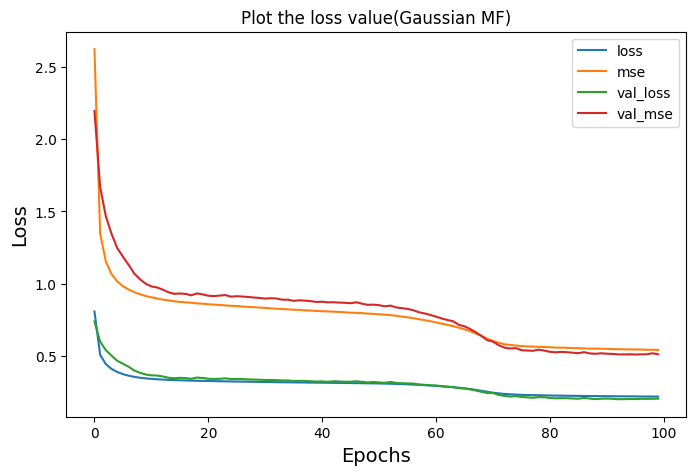

In [ ]:
if plot_learningcurves:
    loss_curves = pd.DataFrame(history.history)
    loss_curves.plot(figsize=(8, 5))
    #plt.grid(True)
    plt.title('Plot the loss value(Gaussian MF)')
    plt.xlabel('Epochs', size=14)
    plt.ylabel('Loss', size=14)
    plt.show()

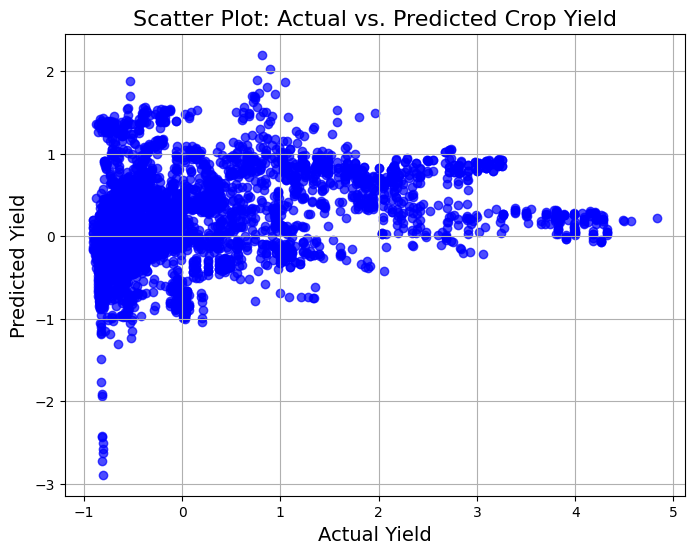

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.title('Scatter Plot: Actual vs. Predicted Crop Yield', size=16)
plt.xlabel('Actual Yield', size=14)
plt.ylabel('Predicted Yield', size=14)
plt.grid(True)
plt.show()

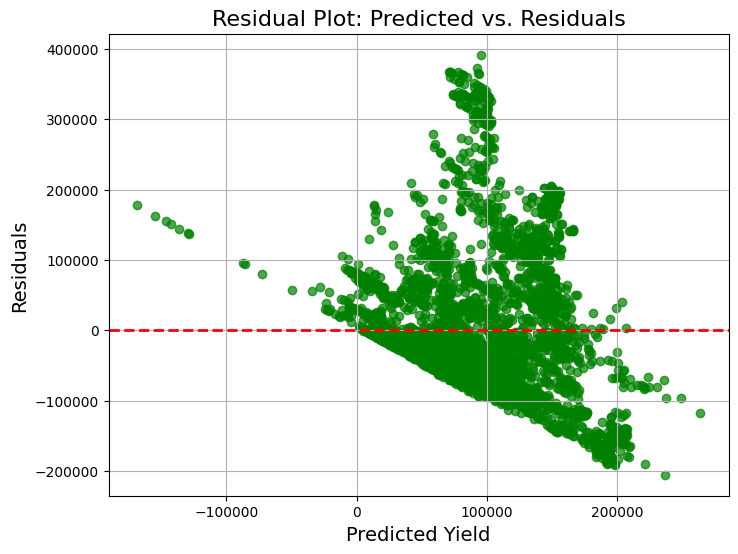

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_original, y_test_original - y_pred_original, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot: Predicted vs. Residuals', size=16)
plt.xlabel('Predicted Yield', size=14)
plt.ylabel('Residuals', size=14)
plt.grid(True)
plt.show()

In [ ]:
# plt.figure(figsize=(8, 6))
# plt.boxplot([y_test, y_pred], labels=['Actual', 'Predicted'])
# plt.title('Box Plot: Actual vs. Predicted Crop Yield', size=16)
# plt.ylabel('Yield', size=14)
# plt.grid(True)
# plt.show()

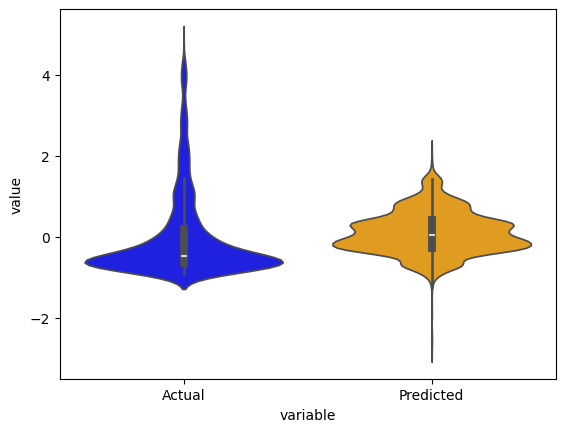

In [ ]:
import seaborn as sns

# Assuming y_test and y_pred are numpy arrays or similar structures.
# Convert y_test and y_pred to pandas Series with a name attribute for easy identification.
y_test_series = pd.Series(y_test.flatten(), name='Actual')
y_pred_series = pd.Series(y_pred.flatten(), name='Predicted')

# Concatenate both Series into a DataFrame along the column axis (axis=1) and then melt it for long-format.
# Alternatively, you can construct a DataFrame that represents them side by side and then melt it for seaborn.
df_plot = pd.concat([y_test_series, y_pred_series], axis=1)
df_plot_long = pd.melt(df_plot, value_vars=['Actual', 'Predicted'])

# Now, you can use seaborn's violinplot to plot the long-format DataFrame.
sns.violinplot(x="variable", y="value", data=df_plot_long, palette=['blue', 'orange'])

plt.show()

In [ ]:
for actual, predicted in zip(y_test_original.flatten(), y_pred_original.flatten()):
    print(f"Actual: {actual:.3f}, Predicted: {predicted:.3f}")


# manually check ANFIS Layers step-by-step

    # L1 = myanfis.FuzzyLayer(n_input, n_memb)
    # L1(X) # to call build function
    # mus = fis.mus
    # sigmas = fis.sigmas
    # L1.set_weights([fis.mus, fis.sigmas])

    # op1 = np.array(L1(Xs))

    # L2 = myanfis.RuleLayer(n_input, n_memb)
    # op2 = np.array(L2(op1))

    # L3 = myanfis.NormLayer()
    # op3 = np.array(L3(op2))

    # L4 = myanfis.DefuzzLayer(n_input, n_memb)
    # L4(op3, Xs) # to call build function
    # bias = fis.bias
    # weights = fis.weights
    # L4.set_weights([fis.bias, fis.weights])
    # op4 = np.array(L4(op3, Xs))

    # L5 = myanfis.SummationLayer()
    # op5 = np.array(L5(op4))

Streaming output truncated to the last 5000 lines.
Actual: 47573.000, Predicted: 136399.578
Actual: 175000.000, Predicted: 139883.391
Actual: 100000.000, Predicted: 124486.266
Actual: 46154.000, Predicted: 126297.398
Actual: 45189.000, Predicted: 162700.453
Actual: 19266.000, Predicted: 86330.492
Actual: 31398.000, Predicted: 10499.473
Actual: 50000.000, Predicted: 137126.547
Actual: 168433.000, Predicted: 140766.922
Actual: 100000.000, Predicted: 127042.680
Actual: 46667.000, Predicted: 128808.922
Actual: 45000.000, Predicted: 165192.766
Actual: 19409.000, Predicted: 88599.328
Actual: 32218.000, Predicted: 12546.203
Actual: 49514.000, Predicted: 139368.641
Actual: 165714.000, Predicted: 142919.266
Actual: 100000.000, Predicted: 125048.703
Actual: 45000.000, Predicted: 126916.688
Actual: 46014.000, Predicted: 166017.641
Actual: 19552.000, Predicted: 89582.047
Actual: 33136.000, Predicted: 13602.531
Actual: 50000.000, Predicted: 138086.766
Actual: 165000.000, Predicted: 141840.594
Actua